In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
analysis = pd.DataFrame({
    'country': ['canada','chile','india','myanmar','mexico','nepal','pakistan','peru','turkey'],
    'magnitude': [2.06,5.36,5.33,4.76,4.15,4.47,4.08,4.54,4.39],
    'depth': [14.69,59.62,28.36,42.36,39.10,13.03,22.18,75.74,14.46],
    'freq': [2248,59672,2273,1024,27113,652,963,11415,11376],
    'gdp_billion_usd': [2200,352,3400,65,1800,40,375,250,900]
})

In [ ]:
sns.scatterplot(data=analysis, x='freq', y='magnitude', hue='country', s=100)
plt.title('Earthquake Frequency vs Magnitude')
plt.xlabel('Frequency of Earthquakes')
plt.ylabel('Average Magnitude')
plt.show()


Correlation: -0.13999831740167207


In [8]:
# Economic Risk = Magnitude × Frequency ÷ GDP
analysis['risk_index'] = (analysis['magnitude'] * analysis['freq']) / analysis['gdp_billion_usd']
ranking = analysis[['country','risk_index']].sort_values(by='risk_index', ascending=False)
print(ranking)


    country  risk_index
1     chile  908.641818
7      peru  207.296400
3   myanmar   74.988308
5     nepal   72.861000
4    mexico   62.510528
8    turkey   55.489600
6  pakistan   10.477440
2     india    3.563262
0    canada    2.104945


In [9]:
# World Bank. (2023). Earthquakes and the economy: Assessing the financial impact of natural disasters. World Bank Publications, 4, 102–118.

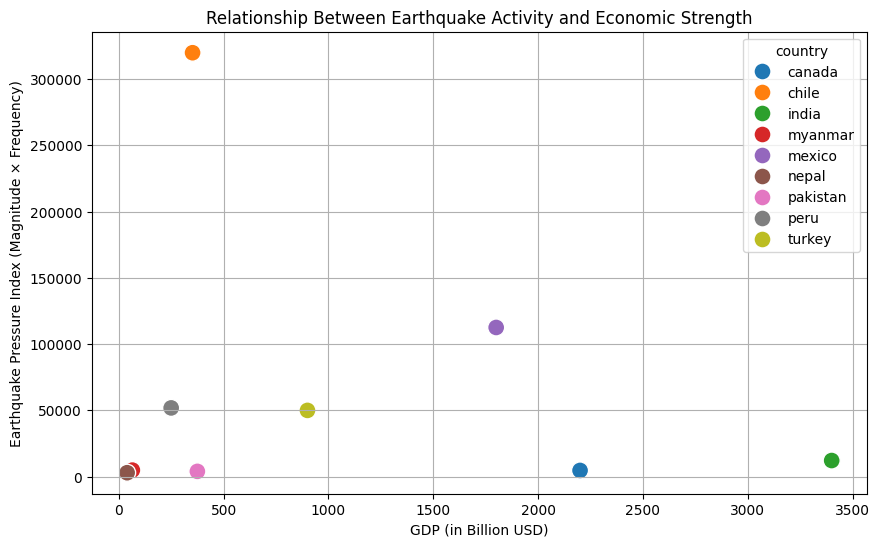

In [10]:
analysis['eq_pressure'] = analysis['magnitude'] * analysis['freq']

# Plot: Economic strength vs Earthquake Pressure
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis, x='gdp_billion_usd', y='eq_pressure', hue='country', s=150)

plt.title('Relationship Between Earthquake Activity and Economic Strength')
plt.xlabel('GDP (in Billion USD)')
plt.ylabel('Earthquake Pressure Index (Magnitude × Frequency)')
plt.grid(True)
plt.show()


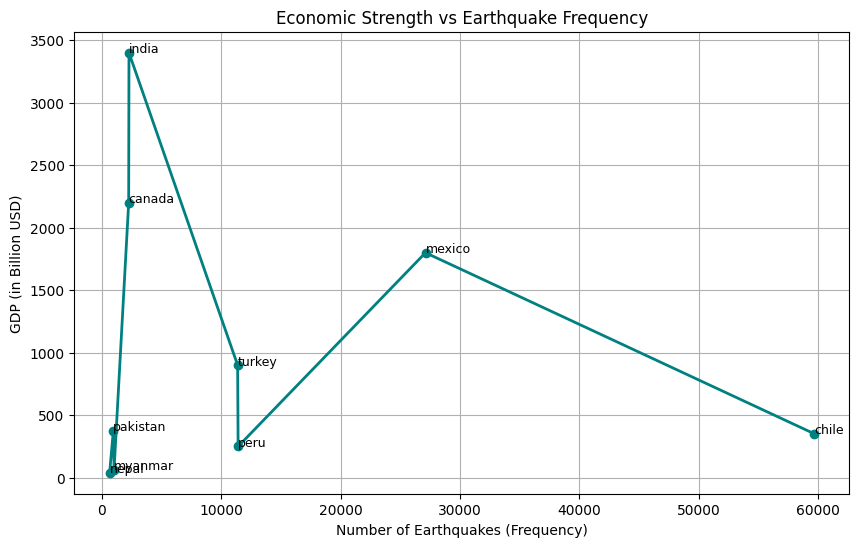

In [ ]:
analysis = analysis.sort_values(by='freq')

plt.figure(figsize=(10,6))
plt.plot(analysis['freq'], analysis['gdp_billion_usd'], marker='o', color='teal', linewidth=2)
plt.title('Economic Strength vs Earthquake Frequency')
plt.xlabel('Number of Earthquakes (Frequency)')
plt.ylabel('GDP (in Billion USD)')
plt.grid(True)

for i in range(len(analysis)):
    plt.text(analysis['freq'].iloc[i], analysis['gdp_billion_usd'].iloc[i], analysis['country'].iloc[i], fontsize=9)

plt.show()

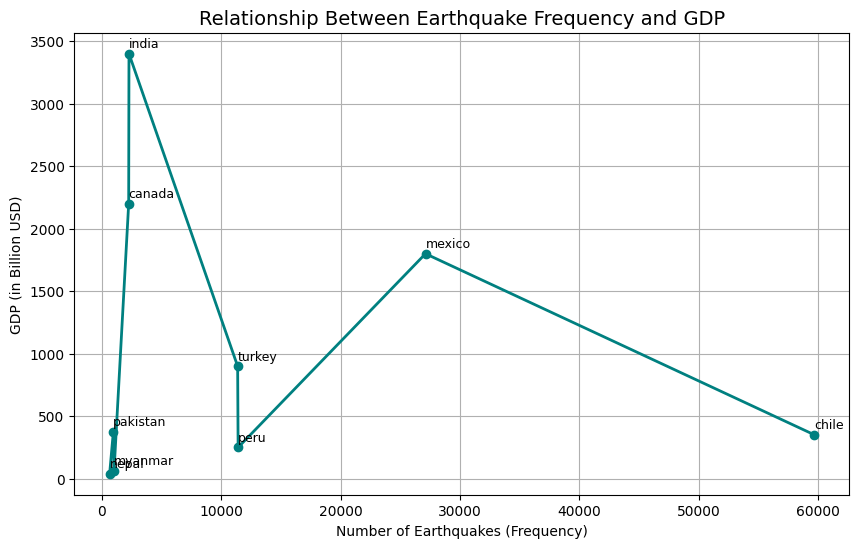

In [ ]:
analysis = analysis.sort_values(by='freq')

plt.figure(figsize=(10,6))
plt.plot(analysis['freq'], analysis['gdp_billion_usd'], marker='o', color='teal', linewidth=2)

plt.title('Relationship Between Earthquake Frequency and GDP', fontsize=14)
plt.xlabel('Number of Earthquakes (Frequency)')
plt.ylabel('GDP (in Billion USD)')
plt.grid(True)

for i in range(len(analysis)):
    plt.text(analysis['freq'].iloc[i], analysis['gdp_billion_usd'].iloc[i]+50, analysis['country'].iloc[i], fontsize=9)

plt.show()

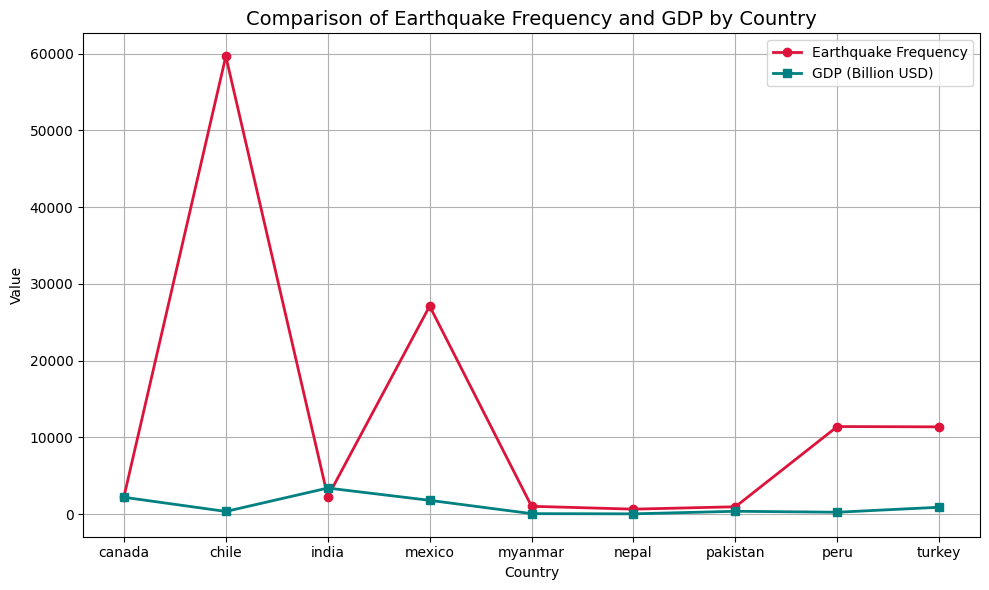

In [ ]:
analysis = analysis.sort_values(by='country')

plt.figure(figsize=(10,6))
plt.plot(analysis['country'], analysis['freq'], marker='o', color='crimson', linewidth=2, label='Earthquake Frequency')
plt.plot(analysis['country'], analysis['gdp_billion_usd'], marker='s', color='teal', linewidth=2, label='GDP (Billion USD)')

plt.title('Comparison of Earthquake Frequency and GDP by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


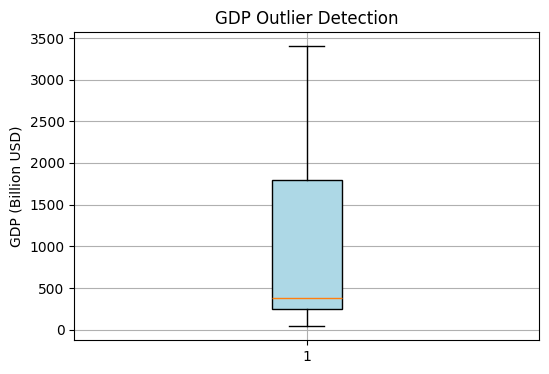

Outliers in GDP:
Empty DataFrame
Columns: [country, gdp_billion_usd]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

analysis = pd.DataFrame({
    'country': ['Canada','Chile','India','Myanmar','Mexico','Nepal','Pakistan','Peru','Turkey'],
    'gdp_billion_usd': [2200,352,3400,65,1800,40,375,250,900]
})

plt.figure(figsize=(6,4))
plt.boxplot(analysis['gdp_billion_usd'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('GDP Outlier Detection')
plt.ylabel('GDP (Billion USD)')
plt.grid(True)
plt.show()

Q1 = analysis['gdp_billion_usd'].quantile(0.25)
Q3 = analysis['gdp_billion_usd'].quantile(0.75)
IQR = Q3 - Q1

outliers = analysis[
    (analysis['gdp_billion_usd'] < Q1 - 1.5*IQR) |
    (analysis['gdp_billion_usd'] > Q3 + 1.5*IQR)
]

print("Outliers in GDP:")
print(outliers)



Outliers in GDP:
 Empty DataFrame
Columns: [country, gdp_billion_usd]
Index: []


C:\Users\Amanp\AppData\Local\Temp\ipykernel_3440\3564024746.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


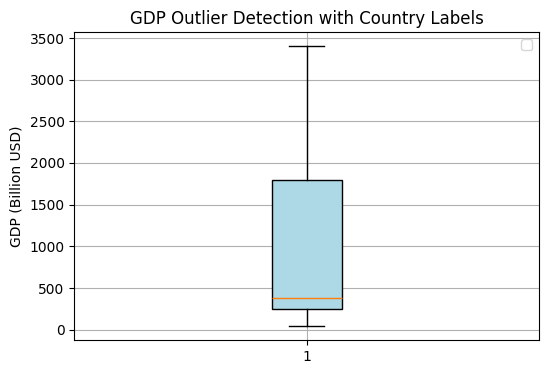

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


analysis = pd.DataFrame({
    'country': ['Canada','Chile','India','Myanmar','Mexico','Nepal','Pakistan','Peru','Turkey'],
    'gdp_billion_usd': [2200,352,3400,65,1800,40,375,250,900]
})

Q1 = analysis['gdp_billion_usd'].quantile(0.25)
Q3 = analysis['gdp_billion_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = analysis[
    (analysis['gdp_billion_usd'] < lower_limit) |
    (analysis['gdp_billion_usd'] > upper_limit)
]

print("Outliers in GDP:\n", outliers[['country', 'gdp_billion_usd']])

plt.figure(figsize=(6,4))
plt.boxplot(analysis['gdp_billion_usd'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('GDP Outlier Detection with Country Labels')
plt.ylabel('GDP (Billion USD)')
plt.grid(True)

for i in range(len(outliers)):
    country = outliers.iloc[i]['country']
    gdp = outliers.iloc[i]['gdp_billion_usd']
    plt.scatter(1, gdp, color='red', s=80, label=country if i == 0 else "")
    plt.text(1.05, gdp, country, fontsize=9, color='darkred')

plt.legend()
plt.show()


In [4]:
analysis = pd.DataFrame({
    'country': ['Canada','Chile','India','Myanmar','Mexico','Nepal','Pakistan','Peru','Turkey'],
    'freq': [2248,59672,2273,1024,27113,652,963,11415,11376],
    'gdp_billion_usd': [2200,352,3400,65,1800,40,375,250,900]
})


In [5]:
corr = analysis['freq'].corr(analysis['gdp_billion_usd'])
print("Correlation:", corr)



Correlation: -0.13999831740167207


In [6]:
X = analysis[['freq']]
y = analysis['gdp_billion_usd']
model = LinearRegression().fit(X, y)
analysis['predicted_gdp'] = model.predict(X)

In [7]:
analysis['freq_z'] = zscore(analysis['freq'])
analysis['gdp_z'] = zscore(analysis['gdp_billion_usd'])

C:\Users\Amanp\AppData\Local\Temp\ipykernel_21996\1128474129.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([analysis['freq'], analysis['gdp_billion_usd']], labels=['Frequency', 'GDP'])


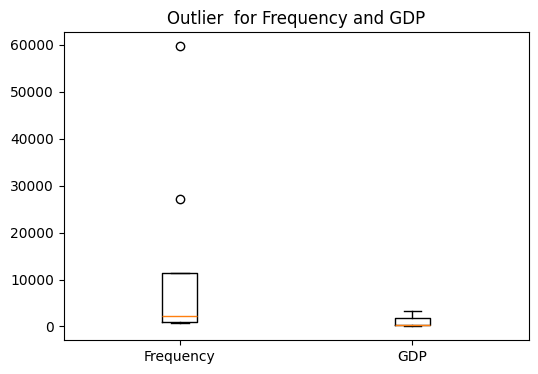

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot([analysis['freq'], analysis['gdp_billion_usd']], labels=['Frequency', 'GDP'])
plt.title('Outlier  for Frequency and GDP')
plt.show()

Regression Equation: GDP = -0.0084 * Frequency + 1151.4366
R² Score: 0.019599528875299366


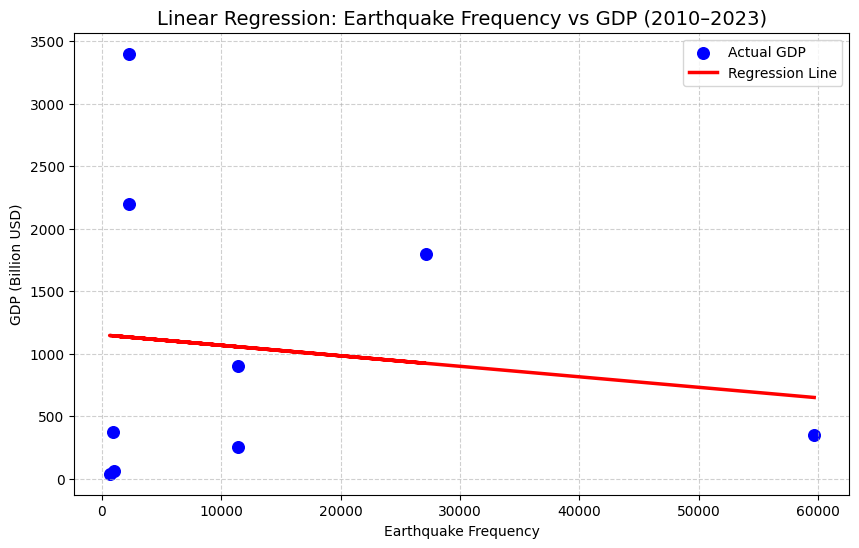

In [ ]:
data = {
    'Country': ['Chile','India','Myanmar','Peru','Nepal','Turkey','Mexico','Pakistan','Canada'],
    'Frequency': [59672,2273,1024,11415,652,11376,27113,963,2248],
    'GDP_Billion_USD': [352,3400,65,250,40,900,1800,375,2200]
}
df = pd.DataFrame(data)

X = df[['Frequency']]   
y = df['GDP_Billion_USD']  

model = LinearRegression()
model.fit(X, y)

df['Predicted_GDP'] = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_

print("Regression Equation: GDP = {:.4f} * Frequency + {:.4f}".format(slope, intercept))
print("R² Score:", model.score(X, y))

plt.figure(figsize=(10,6))
plt.scatter(df['Frequency'], df['GDP_Billion_USD'], color='blue', label='Actual GDP', s=70)
plt.plot(df['Frequency'], df['Predicted_GDP'], color='red', linewidth=2.5, label='Regression Line')
plt.title('Linear Regression: Earthquake Frequency vs GDP (2010–2023)', fontsize=14)
plt.xlabel('Earthquake Frequency')
plt.ylabel('GDP (Billion USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()